<a href="https://colab.research.google.com/github/Natalia409634/Grupo7-practica1-ML/blob/main/P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

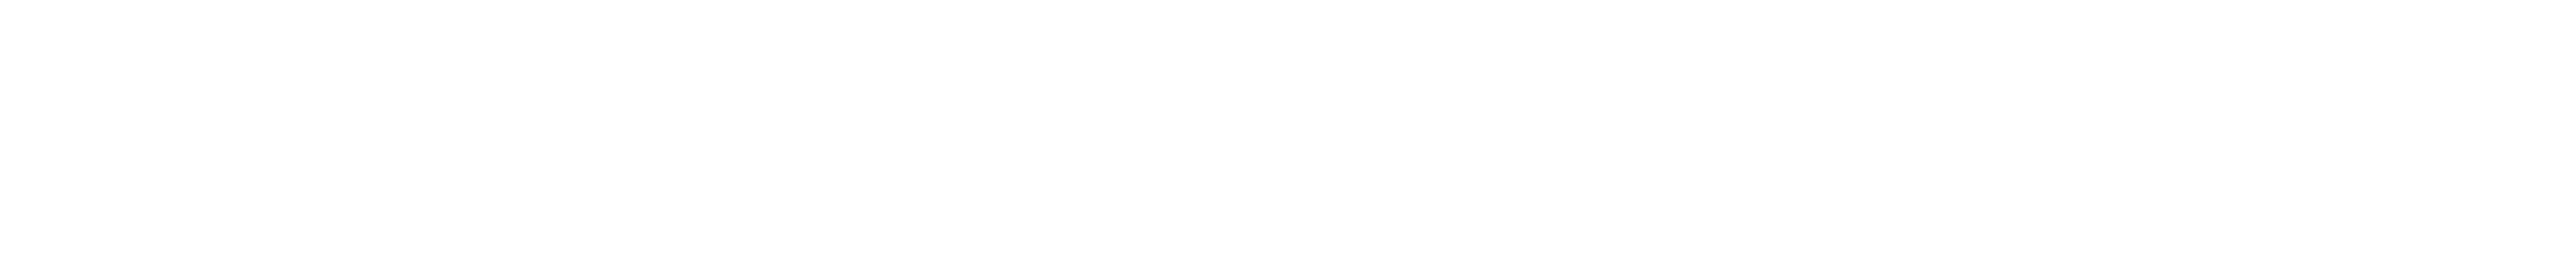

# **PRÁCTICA 1: PREDICCIÓN DE LA ENERGÍA SOLAR**


*   Aprendizaje Automático - Grupo 7
*   Andrés Felipe Camacho Martínez - 100408821
*   Natalia Jiménez Barrigüete - 100409634

# Librerías y lectura de datos

In [24]:
from google.colab import drive
drive.mount('/content/drive')

import time
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
# Instalar statsmodels para intervalos de confianza 
!pip install statsmodels
!pip install --upgrade linear-tree

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Lectura de datos

In [5]:
disp_df, comp_df = [pd.read_csv(f, compression="bz2", index_col=0) for f in 
                    ["/content/drive/MyDrive/Aprendizaje Automático/datos practica/disp_st7ns1.txt.bz2",
                     "/content/drive/MyDrive/Aprendizaje Automático/datos practica/comp_st7ns1.txt.bz2"]]

Edición visual de los gráficos

In [6]:
def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'darkblue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

# Análisis Exploratorio de datos (EDA)


1.   Comprender la naturaleza de los datos
2.   Identificar y tratar los datos faltantes
3.   Analizar la distribución de las variables
4.   Identificar valores atípicos
5.   Normalizamos los datos aplicando Min Max
6.   Analizar la relación entre las variables
7.   Separación en conjuntos
8.   Visualizar los resultados

## 1. Comprender la naturaleza de los datos

In [52]:
disp_df.shape

(4380, 76)

Nuestro conjunto de datos tiene 4380 instancias y 76 variables (15var x 5día + var de salida)

El método info() nos da información sobre las columnas

In [53]:
disp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, V1 to V4380
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  4380 non-null   float64
 1   apcp_sf2_1  4380 non-null   float64
 2   apcp_sf3_1  4380 non-null   float64
 3   apcp_sf4_1  4380 non-null   float64
 4   apcp_sf5_1  4380 non-null   float64
 5   dlwrf_s1_1  4380 non-null   float64
 6   dlwrf_s2_1  4380 non-null   float64
 7   dlwrf_s3_1  4380 non-null   float64
 8   dlwrf_s4_1  4380 non-null   float64
 9   dlwrf_s5_1  4380 non-null   float64
 10  dswrf_s1_1  4380 non-null   float64
 11  dswrf_s2_1  4380 non-null   float64
 12  dswrf_s3_1  4380 non-null   float64
 13  dswrf_s4_1  4380 non-null   float64
 14  dswrf_s5_1  4380 non-null   float64
 15  pres_ms1_1  4380 non-null   float64
 16  pres_ms2_1  4380 non-null   float64
 17  pres_ms3_1  4380 non-null   float64
 18  pres_ms4_1  4380 non-null   float64
 19  pres_ms5_1  4380 non-null   fl

In [54]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, V4381 to V5113
Data columns (total 75 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  733 non-null    float64
 1   apcp_sf2_1  733 non-null    float64
 2   apcp_sf3_1  733 non-null    float64
 3   apcp_sf4_1  733 non-null    float64
 4   apcp_sf5_1  733 non-null    float64
 5   dlwrf_s1_1  733 non-null    float64
 6   dlwrf_s2_1  733 non-null    float64
 7   dlwrf_s3_1  733 non-null    float64
 8   dlwrf_s4_1  733 non-null    float64
 9   dlwrf_s5_1  733 non-null    float64
 10  dswrf_s1_1  733 non-null    float64
 11  dswrf_s2_1  733 non-null    float64
 12  dswrf_s3_1  733 non-null    float64
 13  dswrf_s4_1  733 non-null    float64
 14  dswrf_s5_1  733 non-null    float64
 15  pres_ms1_1  733 non-null    float64
 16  pres_ms2_1  733 non-null    float64
 17  pres_ms3_1  733 non-null    float64
 18  pres_ms4_1  733 non-null    float64
 19  pres_ms5_1  733 non-null    

Observaciones principales:

*   La columna 70 la reconoce como tipo int64 en lugar de float64 como el resto



## 2. Identificar y tratar los datos faltantes
 Los datos pueden contener errores, datos faltantes, duplicados, entre otros problemas. Por lo tanto, necesitamos limpiarlos antes de entrenar el modelo.

In [55]:
disp_df.isnull().sum()

apcp_sf1_1    0
apcp_sf2_1    0
apcp_sf3_1    0
apcp_sf4_1    0
apcp_sf5_1    0
             ..
uswrf_s2_1    0
uswrf_s3_1    0
uswrf_s4_1    0
uswrf_s5_1    0
salida        0
Length: 76, dtype: int64

In [56]:
disp_df.dropna()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.0,0.000000,0.000000,0.000000,250.765400,244.423459,250.810849,269.559490,268.286532,...,247.777202,250.487543,264.160586,260.795116,0,8.000000,49.636364,113.818182,79.181818,11487900
V2,0.000000,0.0,0.000000,0.009091,0.010909,267.362233,250.278670,274.982095,293.350833,281.656355,...,238.549172,233.845458,251.197511,252.962007,0,7.090909,33.000000,93.454545,66.272727,9235200
V3,0.000000,0.0,0.000000,0.000000,0.000000,222.643638,217.905113,224.133093,251.074578,253.476495,...,233.556009,239.208023,257.450057,253.893104,0,8.000000,51.000000,116.090909,80.727273,11895900
V4,0.000909,0.0,0.000000,0.000000,0.000000,269.499409,224.078362,225.675403,237.365465,238.349503,...,244.280412,246.125845,256.927582,252.958314,0,8.000000,51.272727,119.000000,83.636364,12186600
V5,0.000000,0.0,0.000000,0.000000,0.000000,241.344566,244.017960,252.214458,295.031791,304.845553,...,237.979387,243.498259,243.310007,222.655228,0,7.909091,49.454545,106.363636,68.545455,6411300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V4376,0.000909,0.0,0.000909,0.000000,0.000000,268.168651,261.124151,266.273302,281.954662,277.734320,...,249.984808,252.052567,260.826037,260.334861,0,8.454545,49.181818,109.181818,75.363636,11660100
V4377,0.000000,0.0,0.000000,0.000000,0.000000,254.187456,256.191119,263.439742,287.966780,288.432201,...,242.674612,248.607801,269.338423,266.205636,0,8.000000,49.181818,110.727273,76.181818,11555400
V4378,0.000000,0.0,0.000000,0.000000,0.000000,270.627982,265.384824,268.626864,284.752031,284.260479,...,244.978506,256.735739,288.550856,287.388403,0,8.363636,51.090909,116.727273,80.818182,11949900
V4379,0.000000,0.0,0.000000,0.000000,0.000909,268.680231,262.617518,266.925831,290.610293,293.442266,...,257.979990,264.526767,279.741230,265.984283,0,8.454545,51.818182,114.000000,77.000000,11738400


In [57]:
disp_df.drop_duplicates()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.0,0.000000,0.000000,0.000000,250.765400,244.423459,250.810849,269.559490,268.286532,...,247.777202,250.487543,264.160586,260.795116,0,8.000000,49.636364,113.818182,79.181818,11487900
V2,0.000000,0.0,0.000000,0.009091,0.010909,267.362233,250.278670,274.982095,293.350833,281.656355,...,238.549172,233.845458,251.197511,252.962007,0,7.090909,33.000000,93.454545,66.272727,9235200
V3,0.000000,0.0,0.000000,0.000000,0.000000,222.643638,217.905113,224.133093,251.074578,253.476495,...,233.556009,239.208023,257.450057,253.893104,0,8.000000,51.000000,116.090909,80.727273,11895900
V4,0.000909,0.0,0.000000,0.000000,0.000000,269.499409,224.078362,225.675403,237.365465,238.349503,...,244.280412,246.125845,256.927582,252.958314,0,8.000000,51.272727,119.000000,83.636364,12186600
V5,0.000000,0.0,0.000000,0.000000,0.000000,241.344566,244.017960,252.214458,295.031791,304.845553,...,237.979387,243.498259,243.310007,222.655228,0,7.909091,49.454545,106.363636,68.545455,6411300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V4376,0.000909,0.0,0.000909,0.000000,0.000000,268.168651,261.124151,266.273302,281.954662,277.734320,...,249.984808,252.052567,260.826037,260.334861,0,8.454545,49.181818,109.181818,75.363636,11660100
V4377,0.000000,0.0,0.000000,0.000000,0.000000,254.187456,256.191119,263.439742,287.966780,288.432201,...,242.674612,248.607801,269.338423,266.205636,0,8.000000,49.181818,110.727273,76.181818,11555400
V4378,0.000000,0.0,0.000000,0.000000,0.000000,270.627982,265.384824,268.626864,284.752031,284.260479,...,244.978506,256.735739,288.550856,287.388403,0,8.363636,51.090909,116.727273,80.818182,11949900
V4379,0.000000,0.0,0.000000,0.000000,0.000909,268.680231,262.617518,266.925831,290.610293,293.442266,...,257.979990,264.526767,279.741230,265.984283,0,8.454545,51.818182,114.000000,77.000000,11738400


## 3. Analizar la distribución de las variables

**Hay que notar que el display te hace un "resumen". los datos completo están más abajo

In [58]:
cols = disp_df.columns.to_list()

display(set_frame_style(disp_df[cols].head(),'Primeros 12 años de datos'))

display(set_frame_style(disp_df[cols].describe(),'Resumen de estadistica'))

display(set_frame_style(disp_df[cols].isna().any().to_frame().transpose(), 'Columnas con valor nulo'))

display(set_frame_style(disp_df[cols].nunique().to_frame().rename({0:'Numero de valores únicos'}, axis=1).transpose(), 'Valores únicos en cada variable'))

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,dswrf_s1_1,dswrf_s2_1,dswrf_s3_1,dswrf_s4_1,dswrf_s5_1,pres_ms1_1,pres_ms2_1,pres_ms3_1,pres_ms4_1,pres_ms5_1,pwat_ea1_1,pwat_ea2_1,pwat_ea3_1,pwat_ea4_1,pwat_ea5_1,spfh_2m1_1,spfh_2m2_1,spfh_2m3_1,spfh_2m4_1,spfh_2m5_1,tcdc_ea1_1,tcdc_ea2_1,tcdc_ea3_1,tcdc_ea4_1,tcdc_ea5_1,tcolc_e1_1,tcolc_e2_1,tcolc_e3_1,tcolc_e4_1,tcolc_e5_1,tmax_2m1_1,tmax_2m2_1,tmax_2m3_1,tmax_2m4_1,tmax_2m5_1,tmin_2m1_1,tmin_2m2_1,tmin_2m3_1,tmin_2m4_1,tmin_2m5_1,tmp_2m_1_1,tmp_2m_2_1,tmp_2m_3_1,tmp_2m_4_1,tmp_2m_5_1,tmp_sfc1_1,tmp_sfc2_1,tmp_sfc3_1,tmp_sfc4_1,tmp_sfc5_1,ulwrf_s1_1,ulwrf_s2_1,ulwrf_s3_1,ulwrf_s4_1,ulwrf_s5_1,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,250.765400,244.423459,250.810849,269.559490,268.286532,0.000000,30.000000,210.000000,520.000000,343.636364,102055.502841,102235.750000,102209.884943,101936.835938,101872.831676,6.524647,7.627273,8.506254,8.518182,8.627869,0.002534,0.003172,0.003446,0.003233,0.003170,0.000000,0.000000,0.000000,0.000909,0.005455,0.000173,0.000391,0.000227,0.002045,0.006618,281.598877,279.245625,286.155038,288.036230,288.040364,278.911660,277.766252,277.766541,286.278778,278.864233,278.958341,279.230388,286.160964,288.041959,278.911774,277.196558,278.895835,290.008584,290.514271,276.100081,342.485868,332.977009,354.717035,407.410417,388.826680,251.425894,247.777202,250.487543,264.160586,260.795116,0,8.000000,49.636364,113.818182,79.181818,11487900
V2,0.000000,0.000000,0.000000,0.009091,0.010909,267.362233,250.278670,274.982095,293.350833,281.656355,0.000000,30.000000,154.545455,448.181818,302.727273,101200.924006,101263.825284,101303.865057,101343.617898,101781.818892,11.179793,10.496407,9.850264,11.740862,6.224275,0.002993,0.002793,0.003277,0.003982,0.002809,0.018182,0.055455,0.070000,0.034545,0.000000,0.019845,0.055391,0.069945,0.033227,0.001164,279.967773,278.845195,287.473133,287.788499,287.779763,278.197102,274.618808,274.618808,286.177912,282.564714,278.209894,278.834023,287.431874,286.187456,282.563196,277.039099,278.533098,288.739879,287.325476,280.805253,338.159915,324.536491,348.706637,395.381403,383.137440,213.200327,238.549172,233.845458,251.197511,252.962007,0,7.090909,33.000000,93.454545,66.272727,9235200
V3,0.000000,0.000000,0.000000,0.000000,0.000000,222.643638,217.905113,224.133093,251.074578,253.476495,0.000000,30.000000,210.000000,530.000000,350.000000,102436.621449,102390.004972,102036.716619,101495.490057,101383.874290,4.926770,5.140347,6.463636,8.581818,10.200000,0.002536,0.002530,0.002755,0.002943,0.002873,0.000000,0.000000,0.000000,0.001818,0.000000,0.001064,0.000845,0.000664,0.001273,0.001045,276.170088,273.269786,279.622151,283.766785,283.871654,272.399667,271.494093,271.493708,279.780884,279.668329,272.411421,273.273368,279.601729,283.734602,279.937666,271.369418,273.809176,286.896357,286.522816,277.506414,315.458027,306.933780,330.523490,387.520954,374.042120,241.110199,233.556009,239.208023,257.450057,253.893104,0,8.000000,51.000000,116.090909,80.727273,11895900
V4,0.000909,0.000000,0.000000,0.000000,0.000000,269.499409,224.078362,225.675403,237.365465,238.349503,0.000000,30.000000,212.727273,540.000000,359.909091,102460.892756,102716.302557,102816.484375,102560.992188,102516.028409,4.753541,4.596232,4.717448,5.322722,7.302747,0.002525,0.002528,0.002475,0.002573,0.002593,0.000000,0.000000,0.000000,0.000909,0.003636,0.000209,0.000491,0.000436,0.001200,0.005182,281.977866,276.849648,279.332264,281.541279,281.535670,276.948212,275.059146,275.065982,279.461171,274.049336,276.976060,275.472984,279.350478,281.544278,274.126462,275.697496,275.648252,283.773235,285.244407,272.009929,343.129153,323.216109,336.032751,375.752333,361.527410,233.603051,244.280412,246.125845,256.927582,252.958314,0,8.000000,51.272727,119.000000,83.636364,12186600
V5,0.000000,0.000000,

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,dswrf_s1_1,dswrf_s2_1,dswrf_s3_1,dswrf_s4_1,dswrf_s5_1,pres_ms1_1,pres_ms2_1,pres_ms3_1,pres_ms4_1,pres_ms5_1,pwat_ea1_1,pwat_ea2_1,pwat_ea3_1,pwat_ea4_1,pwat_ea5_1,spfh_2m1_1,spfh_2m2_1,spfh_2m3_1,spfh_2m4_1,spfh_2m5_1,tcdc_ea1_1,tcdc_ea2_1,tcdc_ea3_1,tcdc_ea4_1,tcdc_ea5_1,tcolc_e1_1,tcolc_e2_1,tcolc_e3_1,tcolc_e4_1,tcolc_e5_1,tmax_2m1_1,tmax_2m2_1,tmax_2m3_1,tmax_2m4_1,tmax_2m5_1,tmin_2m1_1,tmin_2m2_1,tmin_2m3_1,tmin_2m4_1,tmin_2m5_1,tmp_2m_1_1,tmp_2m_2_1,tmp_2m_3_1,tmp_2m_4_1,tmp_2m_5_1,tmp_sfc1_1,tmp_sfc2_1,tmp_sfc3_1,tmp_sfc4_1,tmp_sfc5_1,ulwrf_s1_1,ulwrf_s2_1,ulwrf_s3_1,ulwrf_s4_1,ulwrf_s5_1,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000
mean,0.440881,0.208098,0.394272,0.201120,0.396356,312.142948,312.121639,320.155393,341.917393,341.475232,0.029120,152.527750,371.834475,712.816023,537.070071,101690.646934,101737.540090,101679.547992,101444.573588,101400.198148,19.842797,19.807822,20.212242,20.658716,20.805452,0.007246,0.007793,0.008040,0.007975,0.008229,0.059969,0.059361,0.054407,0.053733,0.051744,0.060320,0.059686,0.054755,0.054110,0.052146,287.349707,288.516510,293.640515,295.810162,295.902611,284.727563,284.681609,284.667909,293.635035,292.217775,284.936580,288.451720,293.588540,295.667318,292.614234,284.024871,289.996252,297.764336,298.435729,291.675091,376.853798,383.298421,406.443235,455.079645,445.601128,248.822217,248.636010,254.000895,267.052077,265.909351,0.000228,38.455085,79.869863,138.447385,110.226359,17314615.890411
std,1.710421,0.896372,1.620747,0.841560,1.574846,55.168805,57.168335,58.668262,62.360820,62.260298,0.156030,106.428080,153.390090,217.972619,190.169729,758.746049,764.494591,752.395899,736.320249,760.339918,11.378550,11.392199,11.445437,11.495329,11.616122,0.004182,0.004374,0.004226,0.003987,0.004104,0.148323,0.148715,0.144220,0.143098,0.145207,0.148195,0.148572,0.144113,0.142997,0.145078,9.556534,10.194704,10.398525,10.406421,10.392852,9.256939,9.343150,9.344682,10.450860,11.000208,9.178237,10.248218,10.436657,10.421773,11.072713,9.358560,10.903260,10.812613,10.818785,11.634290,49.747196,54.375237,57.838709,64.961622,64.669199,35.232240,35.757661,35.915680,39.676771,38.943608,0.015110,26.374458,30.920307,38.923648,35.395258,7957545.637138
min,0.000000,0.000000,0.000000,0.000000,0.000000,167.959154,162.143445,169.076827,187.214616,186.252052,0.000000,0.000000,20.000000,35.454545,21.818182,99164.946023,98847.185369,98754.556818,98516.754261,98602.835938,1.554545,1.760273,1.343715,1.279167,1.373974,0.000445,0.000437,0.000437,0.000526,0.000531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,256.535583,255.891054,259.971599,262.853210,262.851560,250.438633,250.787951,250.788531,260.108332,258.075894,250.726612,255.898045,259.962641,262.859073,258.070962,248.337158,257.706260,264.184229,265.343584,255.880352,224.114342,227.349122,251.314349,281.468367,275.763675,102.943994,115.35

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,dswrf_s1_1,dswrf_s2_1,dswrf_s3_1,dswrf_s4_1,dswrf_s5_1,pres_ms1_1,pres_ms2_1,pres_ms3_1,pres_ms4_1,pres_ms5_1,pwat_ea1_1,pwat_ea2_1,pwat_ea3_1,pwat_ea4_1,pwat_ea5_1,spfh_2m1_1,spfh_2m2_1,spfh_2m3_1,spfh_2m4_1,spfh_2m5_1,tcdc_ea1_1,tcdc_ea2_1,tcdc_ea3_1,tcdc_ea4_1,tcdc_ea5_1,tcolc_e1_1,tcolc_e2_1,tcolc_e3_1,tcolc_e4_1,tcolc_e5_1,tmax_2m1_1,tmax_2m2_1,tmax_2m3_1,tmax_2m4_1,tmax_2m5_1,tmin_2m1_1,tmin_2m2_1,tmin_2m3_1,tmin_2m4_1,tmin_2m5_1,tmp_2m_1_1,tmp_2m_2_1,tmp_2m_3_1,tmp_2m_4_1,tmp_2m_5_1,tmp_sfc1_1,tmp_sfc2_1,tmp_sfc3_1,tmp_sfc4_1,tmp_sfc5_1,ulwrf_s1_1,ulwrf_s2_1,ulwrf_s3_1,ulwrf_s4_1,ulwrf_s5_1,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,dswrf_s1_1,dswrf_s2_1,dswrf_s3_1,dswrf_s4_1,dswrf_s5_1,pres_ms1_1,pres_ms2_1,pres_ms3_1,pres_ms4_1,pres_ms5_1,pwat_ea1_1,pwat_ea2_1,pwat_ea3_1,pwat_ea4_1,pwat_ea5_1,spfh_2m1_1,spfh_2m2_1,spfh_2m3_1,spfh_2m4_1,spfh_2m5_1,tcdc_ea1_1,tcdc_ea2_1,tcdc_ea3_1,tcdc_ea4_1,tcdc_ea5_1,tcolc_e1_1,tcolc_e2_1,tcolc_e3_1,tcolc_e4_1,tcolc_e5_1,tmax_2m1_1,tmax_2m2_1,tmax_2m3_1,tmax_2m4_1,tmax_2m5_1,tmin_2m1_1,tmin_2m2_1,tmin_2m3_1,tmin_2m4_1,tmin_2m5_1,tmp_2m_1_1,tmp_2m_2_1,tmp_2m_3_1,tmp_2m_4_1,tmp_2m_5_1,tmp_sfc1_1,tmp_sfc2_1,tmp_sfc3_1,tmp_sfc4_1,tmp_sfc5_1,ulwrf_s1_1,ulwrf_s2_1,ulwrf_s3_1,ulwrf_s4_1,ulwrf_s5_1,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
Numero de valores únicos,1302,1113,1249,922,1089,4379,4378,4379,4378,4378,14,589,2401,882,3024,4376,4380,4373,4377,4379,4351,4340,4287,4301,4326,4351,4340,4344,4347,4323,1128,1118,1061,1063,1043,3854,3833,3729,3956,3950,4379,4379,4380,4379,4380,4380,4380,4380,4380,4380,4379,4380,4379,4379,4379,4380,4380,4379,4380,4380,4380,4379,4380,4380,4380,4379,4380,4380,4380,4380,2,929,1207,1329,1330,4262


### Conclusiones:


*   Las variables "apcp_sf1" son poco relevantes -> Todo 0
*   No hay ningún valor nulo preocupante
*  Valores que se repiten muy poco: dswrf_s1_1, uswrf_s1_1
*   Medias y medianas de las variables que se repiten poco: no hay gran diferencia, por lo que los outliers no deben ser muy extremos





## 4. Identificar valores atípicos

<Axes: >

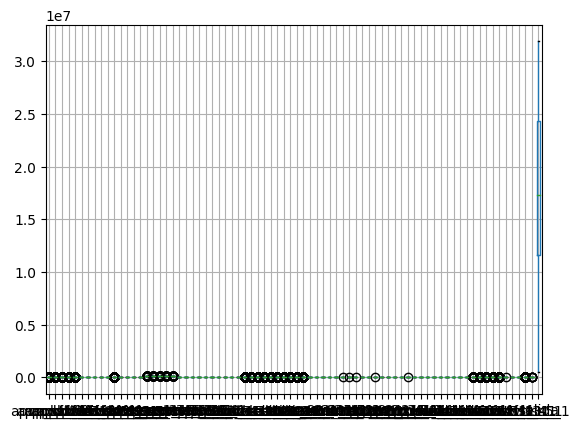

In [59]:
disp_df.boxplot()

## 5. Normalizamos los datos aplicando Min Max

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(disp_df)
df_scaled = scaler.transform(disp_df)
df_scaled = pd.DataFrame(df_scaled, columns=disp_df.columns.values)

## 6. Analizar la relación entre las variables

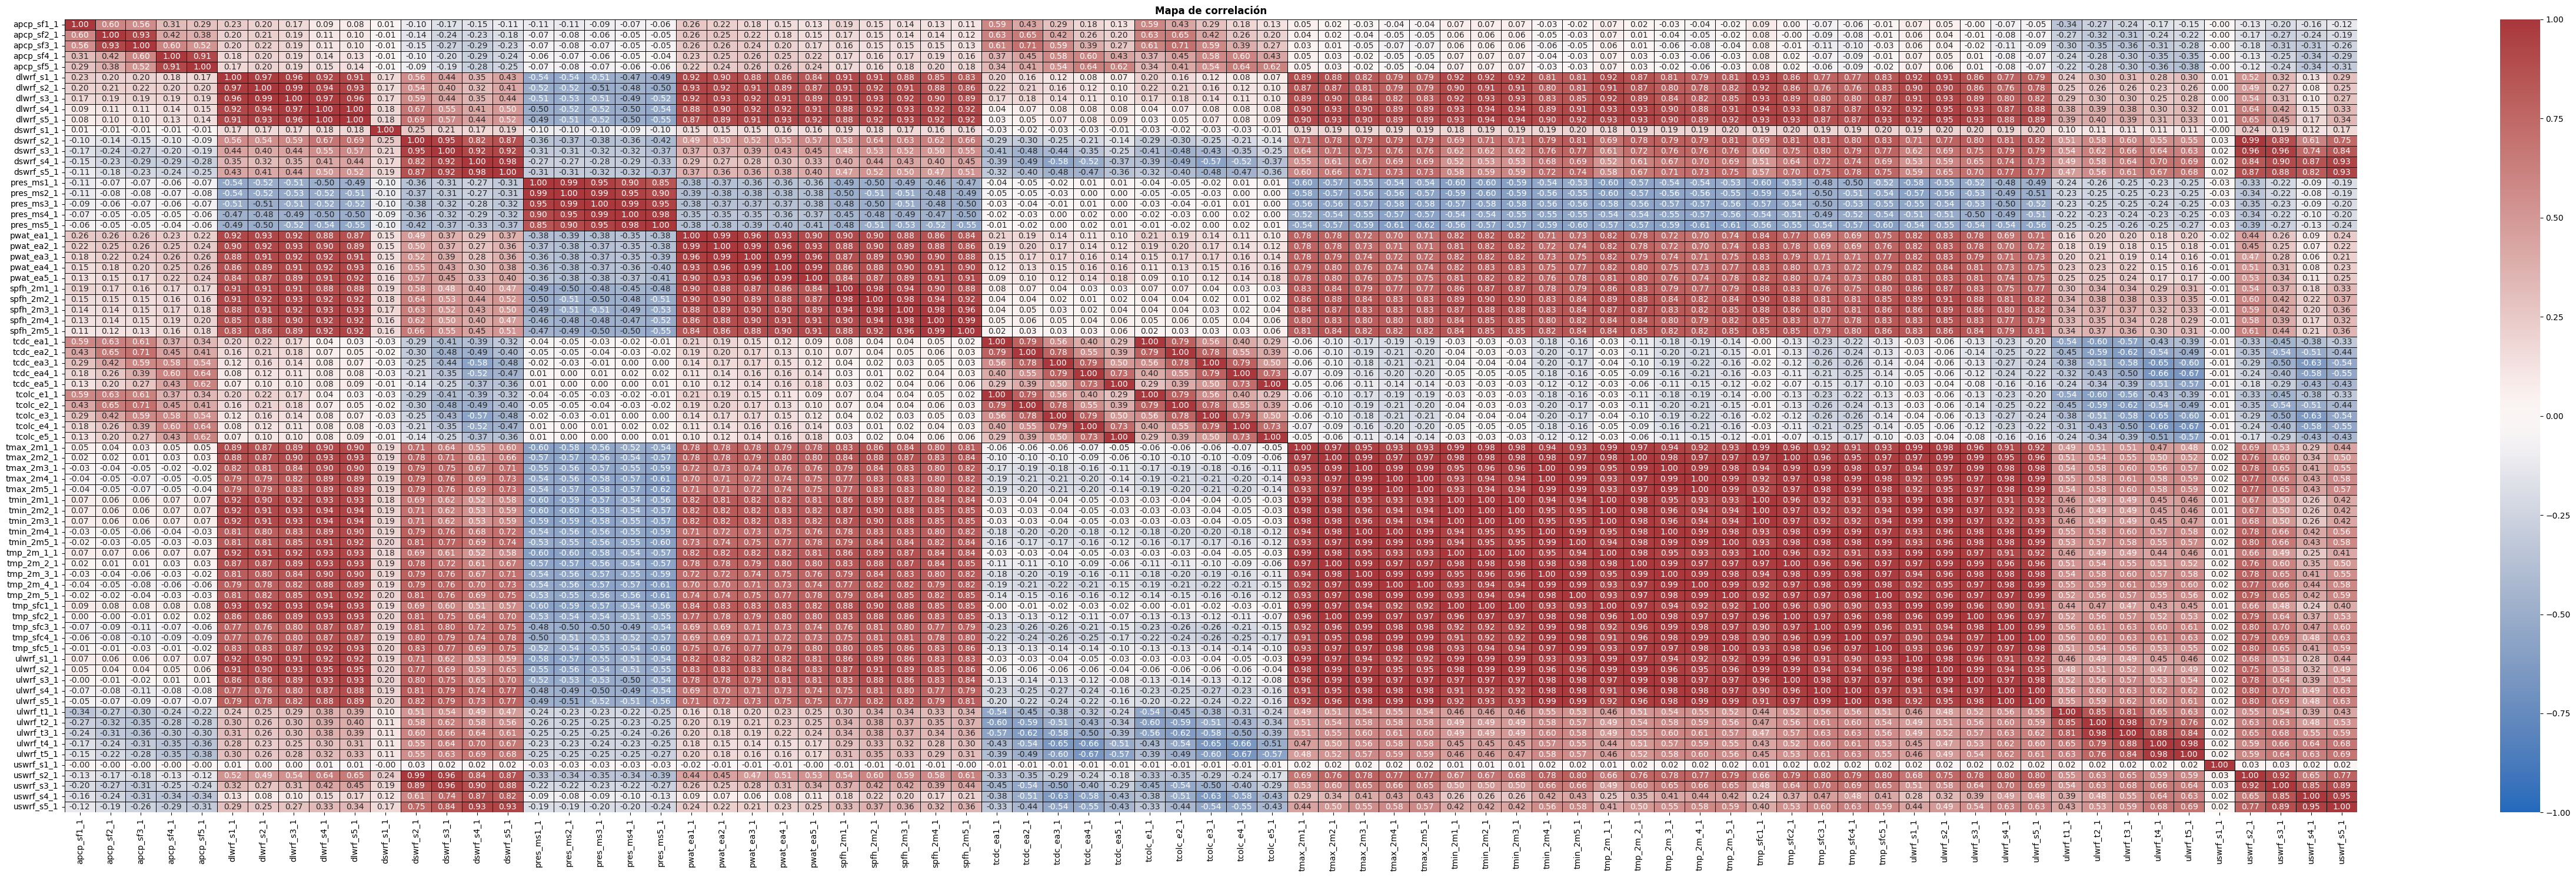

In [61]:
plt.figure(figsize=(50, 15))

df = df_scaled.drop(columns = ['salida'])
ax = sns.heatmap(df.loc[:, df.columns != 'id'].corr(), linecolor='black', linewidth='0.6', cmap="vlag", annot=True, fmt=".2f", vmin=-1, vmax=1)
ax.set_title('Mapa de correlación', weight='bold')

plt.tight_layout()
plt.show()

### Interpretación del mapa de correlación:


*   Alta correlacion entre la temperatura (máxima y mínima) y el flujo radiativo de onda larga en la superficie

*   uswrf_s1_1 (flujo radiativo de onda corta hacia arriba en la superficie) no está correlacionada con ninguna variable



## 7. Separación en conjuntos

Nos debemos quedar con los datos del Dataframe correspondientes a los últimos 10 años

*   El Dataframe cuenta con 4380 (12 años, años de 365 días)
*   Necesitamos eliminar 2 años, es decir, 365*2 = 730 instancias
*   Nuevo tamaño 4380 - 730 = 3650 instancias para el conjunto de entrenamiento
*   Mientras que tendremos 730 instancias para el conjunto de test

In [62]:
df_train = df_scaled.head(3650)
df_test = df_scaled.tail(730)

Conjunto de entrenamiento

In [63]:
X_train = df_train.drop(columns = ['salida'])
y_train = df_train[['salida']]

Conjunto de test

In [64]:
X_test = df_test.drop(columns = ['salida'])
y_test = df_test[['salida']]

**De esta forma (abajo), al poner una semilla, estaríamos desordenando los datos, en el enunciado pone que no hay que aleatorizarlos**

In [65]:
# from sklearn.model_selection import train_test_split

# La semilla es el num de nuestro grupo de prácticas: 7
# X = df_train.drop(columns = ['salida'])
# y = df_train[['salida']]
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1666666666666667, random_state=7)

## 8. Visualizar los resultados

# Métodos Básicos

1.   KNN
2.   Árboles de regresión
3.   Regresión lineal

## a. Evaluación de los modelos con los hiperparámetros por omisión

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

start_time = time.time()

knn = KNeighborsRegressor()

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

# Entrenamos
knn.fit(X_train, y_train)

# Obtenemos las predicciones
y_test_knn = knn.predict(X_test)

end_time = time.time()

# We compute accuracy
rmse_knn = np.sqrt(metrics.mean_squared_error(y_test, y_test_knn))
mae_knn = metrics.mean_absolute_error(y_test, y_test_knn)
r2_knn = metrics.r2_score(y_test, y_test_knn)
time_knn = end_time - start_time

print(f"RMSE of KNN: {rmse_knn}")
print(f"MAE of KNN: {mae_knn}")
print(f"R2 of KNN: {r2_knn}")
print(f"Time of KNN: {time_knn} \n")

### Árboles de regresión

#### Linear Tree Regressor (Lineartree)

In [ ]:
from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor

start_time = time.time()

linearTree = LinearTreeRegressor(base_estimator=LinearRegression())

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

# Entrenamos
linearTree.fit(X_train, y_train)

# Obtenemos las predicciones
y_test_lrtree = linearTree.predict(X_test)

end_time = time.time()

# We compute accuracy
rmse_lrtree = np.sqrt(metrics.mean_squared_error(y_test, y_test_lrtree))
mae_lrtree = metrics.mean_absolute_error(y_test, y_test_lrtree)
r2_lrtree = metrics.r2_score(y_test, y_test_lrtree)
time_lrtree = end_time - start_time

print(f"MSE of the linear tree: {rmse_lrtree}")
print(f"MAE of the linear tree: {mae_lrtree}")
print(f"R2 of the linear tree: {r2_lrtree}")
print(f"Time of the linear tree: {time_lrtree} \n")

#### Decision Tree Regressor (Sklearn)

In [ ]:
from sklearn import tree

start_time = time.time()

regr = tree.DecisionTreeRegressor()

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

# Entrenamos
regr.fit(X_train, y_train)

# Obtenemos las predicciones
y_test_tree = regr.predict(X_test)

end_time = time.time()

# We compute accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_tree))
mae_tree = metrics.mean_absolute_error(y_test, y_test_tree)
r2_tree = metrics.r2_score(y_test, y_test_tree)
time_tree = end_time - start_time

print(f"RMSE of the decision tree: {rmse_tree}")
print(f"MAE of the decision tree: {mae_tree}")
print(f"R2 of the decision tree: {r2_tree}")
print(f"Time of the decision tree: {time_tree} \n")

### Regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

start_time = time.time()

lr = LinearRegression()

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

# Entrenamos
lr.fit(X_train, y_train)

# Obtenemos las predicciones
y_test_lr = lr.predict(X_test)

end_time = time.time()

# We compute accuracy
rmse_linear = np.sqrt(metrics.mean_squared_error(y_test, y_test_lr))
mae_linear = metrics.mean_absolute_error(y_test, y_test_lr)
r2_linear = metrics.r2_score(y_test, y_test_lr)
time_linear = end_time - start_time

print(f"RMSE of linear regression: {rmse_linear}")
print(f"MAE of linear regression: {mae_linear}")
print(f"R2 of linear regression: {r2_linear}")
print(f"Time of linear regression: {time_linear} \n")

### Evaluación

In [83]:
method_list = [('KNN', rmse_knn, mae_knn, r2_knn, time_knn),
              ('Linear Tree Regressor', rmse_lrtree, mae_lrtree, r2_lrtree, time_lrtree),
              ('Decision Tree Regressor', rmse_tree, mae_tree, r2_tree, time_tree),
              ('Linear Regression', rmse_linear, mae_linear, r2_linear, time_linear)]

evaluation_df = pd.DataFrame(method_list, columns = ['Method', 'RMSE', 'MAE', 'R2', 'Time'])
evaluation_df

,Method,RMSE,MAE,R2,Time
0,KNN,0.108000,0.072640,0.806221,0.037978
1,Linear Tree Regressor,0.114455,0.074284,0.782367,169.558150
2,Decision Tree Regressor,0.144445,0.094397,0.653374,0.426177
3,Linear Regression,0.098174,0.066862,0.839877,0.052003


INTERPRETACIÓN

## b. Ajuste de los hiperparámetros más importantes

### KNN

Los hiperparámetros más importantes son:


*   n_neighbors - Número de vecinos más próximos a tener en cuenta
*   weights - ['uniform' - los pesos son uniformes, 'distance' - la distancia influye en los pesos]
*   metric - ['minkowski', 'euclidean','manhattan'] Métodos para calcular la distancia con los vecinos

In [72]:
# Calculamos el accuracy del modelo para diferentes valores de n_neighbors
aux = np.zeros(100)

for i in range(1, 101):
  knn = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)
  ypred = knn.predict(X_test)
  aux[i-1] = np.sqrt(metrics.mean_squared_error(y_test, ypred))

In [ ]:
# Graficamos los resultados
loc = np.arange(1, 50, step=1.0)
plt.figure(figsize = (15, 6))
plt.plot(range(1, 50), aux[:49])
plt.xticks(loc)
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.show()

INTERPRETACIÓN
Observamos que el comportamiento del modelo a priori es mejor cuando n_neighbors toma los siguientes valores [5, 12, 15, 19, 20, 21]

En la búsqueda por el ajuste de los hiperparámetros utilizaremos como método de búsqueda Grid-search, el cual nos da la posibilidad de concretar la lista de valores a probar

In [86]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors' : [5, 12, 15, 19, 20, 21],
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski', 'euclidean','manhattan']}

gs = GridSearchCV(KNeighborsRegressor(), grid_params, n_jobs = -1)

g_res = gs.fit(X_train, y_train)

In [89]:
g_res.best_score_
print(g_res.best_params_)

{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}


Una vez obtenidos los hiperparámetros óptimos, comprobamos sus resultados en el modelo

In [94]:
start_time = time.time()

opt_knn = KNeighborsRegressor(n_neighbors = 20, weights = 'distance', metric = 'manhattan')

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

opt_knn.fit(X_train, y_train)

opt_y_test_knn = knn.predict(X_test)

end_time = time.time()

# We compute accuracy
rmse_opt_knn = np.sqrt(metrics.mean_squared_error(y_test, opt_y_test_knn))
mae_opt_knn = metrics.mean_absolute_error(y_test, opt_y_test_knn)
r2_opt_knn = metrics.r2_score(y_test, opt_y_test_knn)
time_opt_knn = end_time - start_time

print(f"RMSE of final KNN: {rmse_opt_knn}")
print(f"MAE of final KNN: {mae_opt_knn}")
print(f"R2 of final KNN: {r2_opt_knn}")
print(f"Time of final KNN: {time_opt_knn} \n")

RMSE of final KNN: 0.10893845177103492
MAE of final KNN: 0.07461454226594053
R2 of final KNN: 0.8028394577166295
Time of final KNN: 0.23439311981201172 



## Árboles de regresión